In [86]:
from PIL import Image

img = Image.open("bild_selbst.png")
img = img.resize((round(img.size[0] / 5), round(img.size[1] / 5)), resample=Image.BICUBIC)

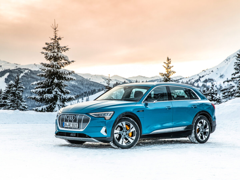

In [87]:
img

In [88]:
import keras.models as models

filename = "model.h5"

model = models.load_model(filename)

In [89]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageDraw

size = 100
step_size = 50

cars = [] 

for x in range(0, img.size[0] - size, step_size):
    for y in range(0, img.size[1] - size, step_size):
        part = img.crop((x, y, x + size, y + size))
        data = np.asarray(part.resize((32, 32), resample=Image.BICUBIC))
        data = data.astype(np.float32) / 255.
        
        pred = model.predict(data.reshape(-1, 32, 32, 3))
        #Ist die Wahrscheinlichkeit für ein Auto größer als 90%?
        if pred[0][0] > 0.9:
            cars.append((x, y))

out = img.copy()
draw = ImageDraw.Draw(out)

for car in cars:
    # points = [
    #    car,
    #    (car[0] + size, car[1] + size)
    #]
    #print(points)
    # draw.rectangle(points)
    
    points = [
        car,
        (car[0], car[1] + size),
        (car[0] + size, car[1] + size),
        (car[0] + size, car[1]),
        car
    ]
    draw.line(points, "yellow", 3)
    print(car)

(100, 50)


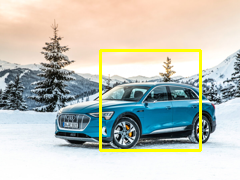

In [90]:
out